In [1]:
from keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils
from keras.models import Sequential
from keras.utils import array_to_img, img_to_array, load_img
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score

In [2]:
path = r"C:\\Users\\USER\\Desktop\\font_original" #원본 이미지 경로 
copy_path = r"C:\\Users\\USER\\Desktop\\font_classifier" #복사 및 분류된 이미지 경로

### 데이터 분류

In [3]:
import splitfolders

splitfolders.ratio(path, output=copy_path, seed = 43, ratio = (.5,.2,.3))  #train, val, test 순으로 분류

Copying files: 55860 files [03:00, 308.67 files/s]


In [4]:
print(len(os.listdir(copy_path + '\\val')))
print(len(os.listdir(copy_path + '\\train')))
print(len(os.listdir(copy_path + '\\test')))

5
5
5


### 데이터 정형화

In [5]:
trainDataGen = ImageDataGenerator(rescale=1./255)

In [6]:
currentPath = copy_path + '\\train'

In [7]:
trainGenSet = trainDataGen.flow_from_directory(
    currentPath,
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

Found 27930 images belonging to 5 classes.


-----------------------------

In [8]:
valDataGen = ImageDataGenerator(rescale=1./255)

In [9]:
currentPath = copy_path + '\\val'

In [10]:
valGenSet = valDataGen.flow_from_directory(
    currentPath,
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

Found 11170 images belonging to 5 classes.


--------------------------

In [11]:
testDataGen = ImageDataGenerator(rescale=1./255)

In [12]:
currentPath = copy_path + '\\test'

In [13]:
testGenSet = testDataGen.flow_from_directory(
    currentPath,
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

Found 16760 images belonging to 5 classes.


### 모델 구성

In [14]:
# 모델 구성
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(28,28,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
    
model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu')) # 뉴런의 입력과 출력을 연결하는 역할(출력되는 뉴런 수, 입력되는 뉴런수, 가중치, 함수)
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))  #18로 되어있었는데, 출력 라벨을 바꿔야 할 거 같은 구글링 결과가 나와서 바꿔봄...! => 성공!!! (validation, train의 라벨이 다 같아야 함!!)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0

### 모델 훈련

In [16]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
results = model.fit(
    trainGenSet,
    steps_per_epoch=40,
    epochs=400,
    validation_data=valGenSet,
    validation_steps=20
)

Epoch 1/400
40/40 [==============================] - 17s 439ms/step - loss: 0.0373 - accuracy: 0.9871 - val_loss: 0.0218 - val_accuracy: 0.9914
Epoch 2/400
40/40 [==============================] - 17s 416ms/step - loss: 0.0253 - accuracy: 0.9937 - val_loss: 0.0085 - val_accuracy: 0.9984
Epoch 3/400
40/40 [==============================] - 17s 418ms/step - loss: 0.0346 - accuracy: 0.9898 - val_loss: 0.3001 - val_accuracy: 0.9086
Epoch 4/400
40/40 [==============================] - 17s 434ms/step - loss: 0.0839 - accuracy: 0.9723 - val_loss: 0.0113 - val_accuracy: 0.9961
Epoch 5/400
40/40 [==============================] - 14s 355ms/step - loss: 0.0278 - accuracy: 0.9902 - val_loss: 0.0152 - val_accuracy: 0.9953
Epoch 6/400
40/40 [==============================] - 13s 324ms/step - loss: 0.0256 - accuracy: 0.9910 - val_loss: 0.0143 - val_accuracy: 0.9969
Epoch 7/400
40/40 [==============================] - 14s 347ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0146 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


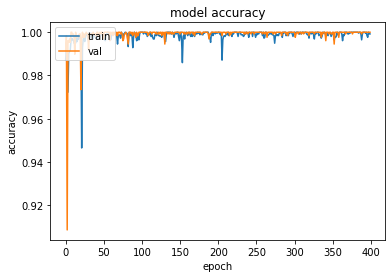

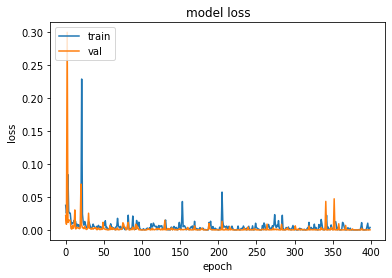

In [20]:
# list all data in history
print(results.history.keys())

import numpy as np
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 모델 정확도 검사

In [22]:
scores = model.evaluate(testGenSet)

print(scores)

262/262 [==============================] - 19s 72ms/step - loss: 0.0115 - accuracy: 0.9980
[0.011524620465934277, 0.9979713559150696]
